In [1]:
#!/usr/bin/python
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.1.0


In [2]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './CK+48',
    target_size=(48,48),
    class_mode='categorical',
    color_mode='grayscale'
)

Found 981 images belonging to 7 classes.


In [3]:
print(train_generator.class_indices)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}


In [4]:

model = tf.keras.models.Sequential()
       
model.add(tf.keras.layers.Conv2D(32, (1, 1), strides=1, padding='same', input_shape=(48, 48, 1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7))
model.add(tf.keras.layers.Activation('softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0

In [5]:
#logdir = os.path.join('callbacks_CK')#for win10
#for mac:
logdir = './callbacks_CK'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'emtion_model_CK.h5')

callbacks = [
    tf.keras.callbacks.TensorBoard(logdir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file, save_weights_only = False, monitor = 'accuracy', save_best_only = True)
]

history = model.fit(
    train_generator,
    nb_epoch=15,
    validation_data=None,
    verbose=1,
    callbacks = callbacks
)

  ...
    to  
  ['...']
Train for 31 steps
Epoch 1/15
31/31 [==============================] - 12s 373ms/step - loss: 1.8663 - accuracy: 0.2365
Epoch 2/15
31/31 [==============================] - 11s 363ms/step - loss: 1.8243 - accuracy: 0.2497
Epoch 3/15
31/31 [==============================] - 11s 365ms/step - loss: 1.8079 - accuracy: 0.2722
Epoch 4/15
31/31 [==============================] - 11s 345ms/step - loss: 1.7569 - accuracy: 0.3323
Epoch 5/15
31/31 [==============================] - 11s 357ms/step - loss: 1.4676 - accuracy: 0.4750
Epoch 6/15
31/31 [==============================] - 11s 354ms/step - loss: 1.0247 - accuracy: 0.6198
Epoch 7/15
31/31 [==============================] - 12s 385ms/step - loss: 0.8135 - accuracy: 0.6830
Epoch 8/15
31/31 [==============================] - 11s 362ms/step - loss: 0.5655 - accuracy: 0.7900
Epoch 9/15
31/31 [==============================] - 11s 357ms/step - loss: 0.4187 - accuracy: 0.8359
Epoch 10/15
31/31 [============================

In [6]:
history.history

{'loss': [1.8665789212655584,
  1.8243544187992964,
  1.8083413783441868,
  1.7569953705071188,
  1.4660758071718596,
  1.0249120123403395,
  0.8137285108473931,
  0.5650743998883332,
  0.41846455680728567,
  0.33362799794788145,
  0.26968759444146345,
  0.20801600950573562,
  0.15622632112069232,
  0.1100816470888898,
  0.11743090219727349],
 'accuracy': [0.23649338,
  0.24974516,
  0.27217126,
  0.33231395,
  0.47502548,
  0.6197757,
  0.68297654,
  0.7900102,
  0.83588177,
  0.88379204,
  0.90519875,
  0.9204893,
  0.95005095,
  0.9622834,
  0.95616716]}

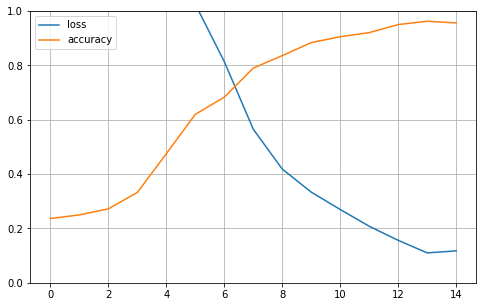

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)